In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("OnlineRetail.csv", encoding="Unicode Escape")

In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
# Converting InvocieData into exact DateTime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], dayfirst=True)

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.duplicated(subset=["CustomerID", "Country"]).value_counts()

True     537520
False      4389
dtype: int64

In [8]:
data.shape

(541909, 8)

In [9]:
# Dropping duplicates to improve efficiency!
country_customer_data = data[["CustomerID", "Country"]].drop_duplicates()

In [10]:
#After removing duplicated values from customerID and Country
country_customer_data.head()

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom


In [11]:
#Displaying the top 7 countries unique values
country_customer_data["Country"].value_counts()[:7]

United Kingdom    3951
Germany             95
France              88
Spain               31
Belgium             25
Switzerland         22
Portugal            20
Name: Country, dtype: int64

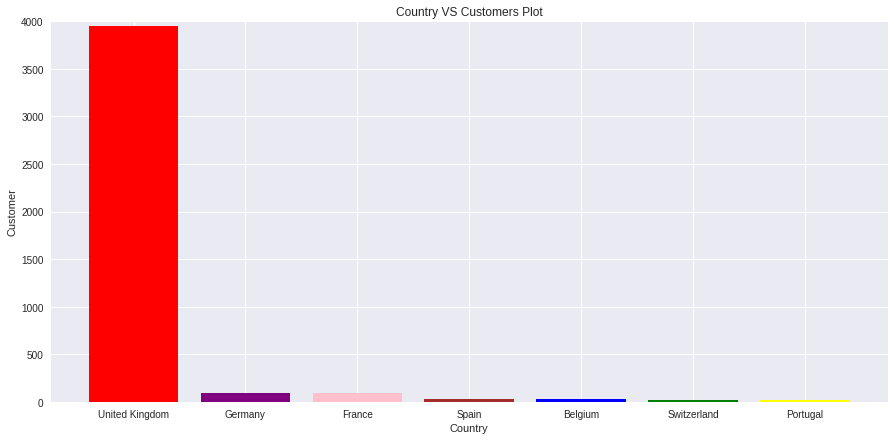

In [12]:
# Plotting top 7 Customers Data

co = ["Red", "Purple","Pink","Brown","Blue", "Green", "Yellow"]

plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(country_customer_data["Country"].value_counts()[:7].index,
       country_customer_data["Country"].value_counts()[:7],
       color = co
          )

ax.set(title = "Country VS Customers Plot",
       xlabel = "Country",
       ylabel = "Customer",
       ylim = (0,4000))


plt.show()

In [13]:
#checking the minimum values of each column respectively
data.min()

InvoiceNo                   536365
StockCode                    10002
Quantity                    -80995
InvoiceDate    2010-01-12 08:26:00
UnitPrice                 -11062.1
CustomerID                   12346
Country                  Australia
dtype: object

In [14]:
# Filtering data for the country having the maximum customers
filtered_data = data[data["Country"] == "United Kingdom"]

In [15]:
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [16]:
# Removing negative quantity value
filtered_data = filtered_data[filtered_data["Quantity"] >= 0 ]

In [17]:
# Removing the negative values of unit price
filtered_data = filtered_data[filtered_data["UnitPrice"] > 0]

In [18]:
print(filtered_data.InvoiceDate.min())
print(filtered_data.InvoiceDate.max())

2010-01-12 08:26:00
2011-12-10 17:19:00


In [19]:
#Filtering the 9 Months data
customer_9m_data = filtered_data[(filtered_data.InvoiceDate <= dt(2011,12,10)) & (filtered_data.InvoiceDate >= dt(2010,1,12))].reset_index()


In [20]:
print(customer_9m_data.InvoiceDate.max()-customer_9m_data.InvoiceDate.min())

696 days 09:32:00


In [21]:
customer_9m_data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [22]:
# Filtering the required Columns
desired_columns_data = customer_9m_data.drop(["StockCode", "Description","Country"], axis = 1)

In [23]:
desired_columns_data.shape

(483394, 6)

In [24]:
desired_columns_data.head()

,index,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,0,536365,6,2010-01-12 08:26:00,2.55,17850.0
1,1,536365,6,2010-01-12 08:26:00,3.39,17850.0
2,2,536365,8,2010-01-12 08:26:00,2.75,17850.0
3,3,536365,6,2010-01-12 08:26:00,3.39,17850.0
4,4,536365,6,2010-01-12 08:26:00,3.39,17850.0


In [25]:
desired_columns_data.InvoiceDate.max()

Timestamp('2011-12-09 17:58:00')

In [26]:
#calculating the total price through a product of unit price and quantity purchased

desired_columns_data['TotalPrice']=desired_columns_data['Quantity']*desired_columns_data['UnitPrice']

In [27]:
desired_columns_data.info

<bound method DataFrame.info of          index InvoiceNo  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0            0    536365         6 2010-01-12 08:26:00       2.55     17850.0   
1            1    536365         6 2010-01-12 08:26:00       3.39     17850.0   
2            2    536365         8 2010-01-12 08:26:00       2.75     17850.0   
3            3    536365         6 2010-01-12 08:26:00       3.39     17850.0   
4            4    536365         6 2010-01-12 08:26:00       3.39     17850.0   
...        ...       ...       ...                 ...        ...         ...   
483389  541889    581585        12 2011-09-12 12:31:00       1.95     15804.0   
483390  541890    581586         8 2011-09-12 12:49:00       2.95     13113.0   
483391  541891    581586        24 2011-09-12 12:49:00       1.25     13113.0   
483392  541892    581586        24 2011-09-12 12:49:00       8.95     13113.0   
483393  541893    581586        10 2011-09-12 12:49:00       7.08     13113.0

In [28]:
#taken the date next to the last date as in order to calculate the recency
present_date=dt(2011,12,11)

In [29]:
desired_columns_data.InvoiceDate.max()-desired_columns_data.InvoiceDate.min()

Timedelta('696 days 09:32:00')

In [30]:
desired_columns_data.head()

,index,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,0,536365,6,2010-01-12 08:26:00,2.55,17850.0,15.30
1,1,536365,6,2010-01-12 08:26:00,3.39,17850.0,20.34
2,2,536365,8,2010-01-12 08:26:00,2.75,17850.0,22.00
3,3,536365,6,2010-01-12 08:26:00,3.39,17850.0,20.34
4,4,536365,6,2010-01-12 08:26:00,3.39,17850.0,20.34


# Recency calculation

In [31]:
#Fetching the max no of date of each customer
rfm=desired_columns_data.groupby('CustomerID').InvoiceDate.max().reset_index()

In [32]:
#Changing the name of the columns
rfm.columns=['CustomerID','Last_purchase_date']

In [33]:
rfm.head()

,CustomerID,Last_purchase_date
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-11-17 17:13:00
2,12748.0,2011-12-05 18:58:00
3,12749.0,2011-11-17 12:05:00
4,12820.0,2011-10-26 13:27:00


In [34]:
#finding the recency
rfm['Recency']=(present_date-rfm['Last_purchase_date']).dt.days

In [35]:
rfm.head()

,CustomerID,Last_purchase_date,Recency
0,12346.0,2011-01-18 10:01:00,326
1,12747.0,2011-11-17 17:13:00,23
2,12748.0,2011-12-05 18:58:00,5
3,12749.0,2011-11-17 12:05:00,23
4,12820.0,2011-10-26 13:27:00,45


In [36]:
#dropping the column last_purchase_date
rfm=rfm.drop(['Last_purchase_date'],axis=1)

In [37]:
rfm.head()

,CustomerID,Recency
0,12346.0,326
1,12747.0,23
2,12748.0,5
3,12749.0,23
4,12820.0,45


# Frequency calculation

In [38]:
#calculation of the freq
freq = desired_columns_data.groupby('CustomerID').InvoiceNo.count().reset_index()

In [39]:
#changing name of columns
freq.columns=['CustomerID','Frequency']

In [40]:
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4595
3,12749.0,199
4,12820.0,59


In [41]:
#merging with rfm as to vsualize recency and freq together
rfm = pd.merge(rfm,freq, on='CustomerID')

In [42]:
rfm.head()

,CustomerID,Recency,Frequency
0,12346.0,326,1
1,12747.0,23,103
2,12748.0,5,4595
3,12749.0,23,199
4,12820.0,45,59


# Monetary 

In [43]:
#calculate Monetory value
mon=desired_columns_data.groupby('CustomerID').TotalPrice.sum().reset_index()

In [44]:
mon.head()

,CustomerID,TotalPrice
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [45]:
#changing the columns name
mon.columns=['CustomerID','Monetary']

In [46]:
mon.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [47]:
#merging monetory to rfm
rfm=pd.merge(rfm,mon,on='CustomerID')

In [48]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,23,103,4196.01
2,12748.0,5,4595,33719.73
3,12749.0,23,199,4090.88
4,12820.0,45,59,942.34
5,12821.0,96,6,92.72
6,12822.0,71,46,948.88
7,12823.0,75,5,1759.50
8,12824.0,30,25,397.12
9,12826.0,60,91,1474.72


# Filtering out the top customers using RFM values

In [49]:
#labels for discretion of the recency ,frequency and monetary
labels=['L','M','H']


In [50]:
#discretion on recency
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 3, labels)


In [51]:
#discretion on Frequency
rfm['F_quartile'] = pd.qcut(rfm['Frequency'], 3, labels)

In [52]:
#discretion on Monetary
rfm['M_quartile'] = pd.qcut(rfm['Monetary'], 3, labels)

In [53]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,326,1,77183.60,H,L,H
1,12747.0,23,103,4196.01,L,H,H
2,12748.0,5,4595,33719.73,L,H,H
3,12749.0,23,199,4090.88,L,H,H
4,12820.0,45,59,942.34,M,M,M


In [54]:
#Merging all the rankings
rfm['Ranking'] = rfm.R_quartile.astype(str)+ rfm.F_quartile.astype(str) + rfm.M_quartile.astype(str)

In [55]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,12346.0,326,1,77183.60,H,L,H,HLH
1,12747.0,23,103,4196.01,L,H,H,LHH
2,12748.0,5,4595,33719.73,L,H,H,LHH
3,12749.0,23,199,4090.88,L,H,H,LHH
4,12820.0,45,59,942.34,M,M,M,MMM


In [56]:
# Filtering out the customers having the least recency and high frequency and Monetary value
final_result=rfm[rfm['Ranking']=='LHH']

In [57]:
final_result.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
1,12747.0,23,103,4196.01,L,H,H,LHH
2,12748.0,5,4595,33719.73,L,H,H,LHH
3,12749.0,23,199,4090.88,L,H,H,LHH
18,12836.0,30,175,2612.86,L,H,H,LHH
21,12839.0,12,314,5591.42,L,H,H,LHH


In [58]:
#filtering out the top customers
final_result=final_result.sort_values('Monetary',ascending=False).reset_index()

In [59]:
final_result=final_result.drop(['index'],axis=1)

In [60]:
#Our Top Customers
final_result.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,18102.0,12,431,259657.30,L,H,H,LHH
1,17450.0,3,337,194550.79,L,H,H,LHH
2,17511.0,6,963,91062.38,L,H,H,LHH
3,16029.0,30,242,81024.84,L,H,H,LHH
4,16684.0,12,277,66653.56,L,H,H,LHH


In [61]:
#Displaying only the necessary data
final_result=final_result.drop(['R_quartile','F_quartile','M_quartile','Ranking'],axis=1)

In [62]:
#Our top Customers
final_result.head()

,CustomerID,Recency,Frequency,Monetary
0,18102.0,12,431,259657.30
1,17450.0,3,337,194550.79
2,17511.0,6,963,91062.38
3,16029.0,30,242,81024.84
4,16684.0,12,277,66653.56


# Prepearing data in order to fit into model

In [63]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,12346.0,326,1,77183.60,H,L,H,HLH
1,12747.0,23,103,4196.01,L,H,H,LHH
2,12748.0,5,4595,33719.73,L,H,H,LHH
3,12749.0,23,199,4090.88,L,H,H,LHH
4,12820.0,45,59,942.34,M,M,M,MMM


In [64]:
#filtering the data in order to make fit into the model
temp = rfm[rfm["Ranking"].isin( ["LHH", "LHM", "LMH", "MHH", "MHM", "MMH"])]

In [65]:
temp.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
1,12747.0,23,103,4196.01,L,H,H,LHH
2,12748.0,5,4595,33719.73,L,H,H,LHH
3,12749.0,23,199,4090.88,L,H,H,LHH
9,12826.0,60,91,1474.72,M,H,H,MHH
13,12830.0,92,38,6814.64,M,M,H,MMH


In [66]:
temp.shape

(1334, 8)

In [67]:
#defining the independent and dependent variable to X(Independent) and Y(Dependent)
X = temp.drop(["CustomerID", "R_quartile", "F_quartile", "M_quartile","Ranking"],axis=1)
y = temp["Ranking"]

In [68]:
X.head()

,Recency,Frequency,Monetary
1,23,103,4196.01
2,5,4595,33719.73
3,23,199,4090.88
9,60,91,1474.72
13,92,38,6814.64


In [69]:
y.head()

1     LHH
2     LHH
3     LHH
9     MHH
13    MMH
Name: Ranking, dtype: object

In [70]:
c = len(set(y))
c

6

In [71]:
#convert pandas type to numpy
y = np.array(y)
type(y)

numpy.ndarray

# ANN implementation

In [72]:
#importing all the required libraries to implement the ANN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns


Using TensorFlow backend.


In [73]:
#converted categorical data into numeric data
encoder = LabelEncoder()
y=encoder.fit_transform(y.reshape(-1, 1))

/home/deepak/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
y

array([0, 0, 0, ..., 2, 0, 0])

In [75]:
#splitting of the data for training and testing in 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [76]:
#using sequential model as a base 
model = Sequential()

In [77]:
#Creating the hidden layers
model.add(Dense(units = 300, activation = "relu", input_shape = (3,)))
model.add(Dense(units = 600, activation = "relu"))
model.add(Dense(units = 900, activation = "relu"))
model.add(Dense(units = 450, activation = "relu"))
model.add(Dense(units = 6, activation = "softmax"))

In [78]:
#model description
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 600)               180600    
_________________________________________________________________
dense_3 (Dense)              (None, 900)               540900    
_________________________________________________________________
dense_4 (Dense)              (None, 450)               405450    
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 2706      
Total params: 1,130,856
Trainable params: 1,130,856
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [80]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
                    monitor = 'loss',
                    verbose = 1,
                    patience = 30,
                    mode = "min"
                    )

mc = ModelCheckpoint(
                    "best_model.h5",
                     verbose = 1,
                     mode = "max",
                     save_best_only = True,
                     monitor = "accuracy"
                    )

In [81]:
#training of the model
trained_model = model.fit(X_train, y_train, epochs = 200, verbose = 1,callbacks=[early_stopping, mc])

Epoch 1/200
1067/1067 [==============================] - 5s 5ms/step - loss: 109.4046 - accuracy: 0.3683

Epoch 00001: accuracy improved from -inf to 0.36832, saving model to best_model.h5
Epoch 2/200
1067/1067 [==============================] - 3s 2ms/step - loss: 9.1345 - accuracy: 0.4227

Epoch 00002: accuracy improved from 0.36832 to 0.42268, saving model to best_model.h5
Epoch 3/200
1067/1067 [==============================] - 3s 2ms/step - loss: 8.8937 - accuracy: 0.4255

Epoch 00003: accuracy improved from 0.42268 to 0.42549, saving model to best_model.h5
Epoch 4/200
1067/1067 [==============================] - 3s 2ms/step - loss: 1.9883 - accuracy: 0.5323

Epoch 00004: accuracy improved from 0.42549 to 0.53233, saving model to best_model.h5
Epoch 5/200
1067/1067 [==============================] - 3s 2ms/step - loss: 2.9712 - accuracy: 0.4930

Epoch 00005: accuracy did not improve from 0.53233
Epoch 6/200
1067/1067 [==============================] - 3s 2ms/step - loss: 1.7724 - 


Epoch 00050: accuracy did not improve from 0.81350
Epoch 51/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.6731 - accuracy: 0.7732

Epoch 00051: accuracy did not improve from 0.81350
Epoch 52/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.9664 - accuracy: 0.7001

Epoch 00052: accuracy did not improve from 0.81350
Epoch 53/200
1067/1067 [==============================] - 3s 2ms/step - loss: 1.0313 - accuracy: 0.6495

Epoch 00053: accuracy did not improve from 0.81350
Epoch 54/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.7443 - accuracy: 0.7460

Epoch 00054: accuracy did not improve from 0.81350
Epoch 55/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.6823 - accuracy: 0.7751

Epoch 00055: accuracy did not improve from 0.81350
Epoch 56/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.6564 - accuracy: 0.7629

Epoch 00056: accuracy did not improve from 0.81350
Epoch 57/200

1067/1067 [==============================] - 3s 2ms/step - loss: 0.3788 - accuracy: 0.8669

Epoch 00101: accuracy did not improve from 0.88004
Epoch 102/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.3497 - accuracy: 0.8857

Epoch 00102: accuracy improved from 0.88004 to 0.88566, saving model to best_model.h5
Epoch 103/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8679

Epoch 00103: accuracy did not improve from 0.88566
Epoch 104/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.7266 - accuracy: 0.8013

Epoch 00104: accuracy did not improve from 0.88566
Epoch 105/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8285

Epoch 00105: accuracy did not improve from 0.88566
Epoch 106/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.3518 - accuracy: 0.8932

Epoch 00106: accuracy improved from 0.88566 to 0.89316, saving model to best_model.h5
Ep

1067/1067 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.8969

Epoch 00152: accuracy did not improve from 0.93627
Epoch 153/200
1067/1067 [==============================] - 2s 2ms/step - loss: 0.5283 - accuracy: 0.8276

Epoch 00153: accuracy did not improve from 0.93627
Epoch 154/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.3491 - accuracy: 0.8688

Epoch 00154: accuracy did not improve from 0.93627
Epoch 155/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.3283 - accuracy: 0.8941

Epoch 00155: accuracy did not improve from 0.93627
Epoch 156/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9194

Epoch 00156: accuracy did not improve from 0.93627
Epoch 157/200
1067/1067 [==============================] - 3s 2ms/step - loss: 0.2220 - accuracy: 0.9278

Epoch 00157: accuracy did not improve from 0.93627
Epoch 158/200
1067/1067 [==============================] - 3s 2ms/step -

In [82]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

# Graph Representation

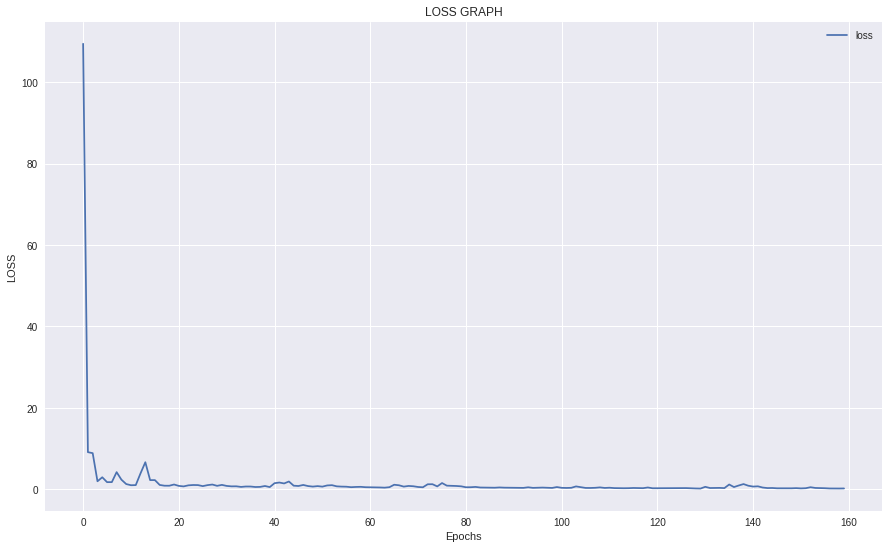

In [83]:
plt.figure(figsize = (15,9))
plt.plot(trained_model.history["loss"], label = "loss")
plt.title("LOSS GRAPH")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

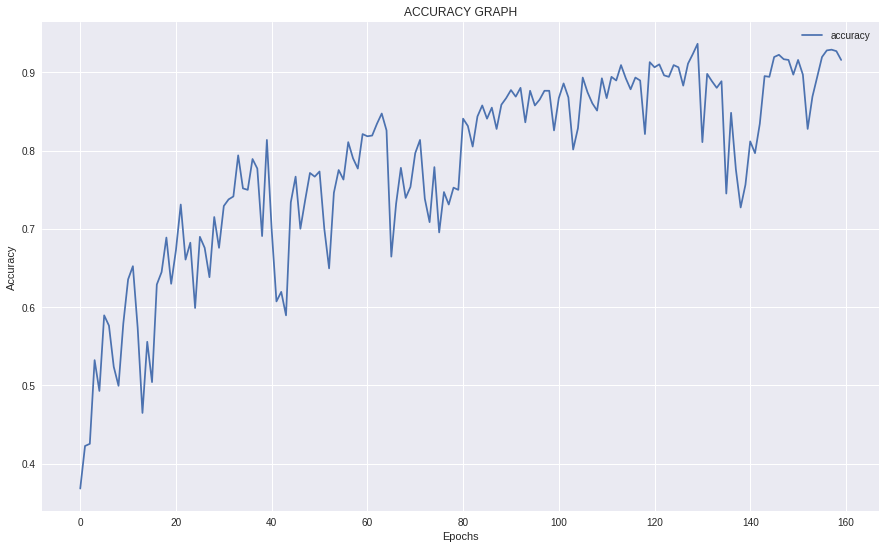

In [84]:
plt.figure(figsize = (15,9))
plt.plot(trained_model.history["accuracy"], label = "accuracy")
plt.title("ACCURACY GRAPH")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Testing of the Best saved model

In [85]:
#evaluating the model
from tensorflow import keras
best_model=keras.models.load_model("best_model.h5")
score = best_model.evaluate(X_test,y_test)

267/267 [==============================] - 1s 3ms/sample - loss: 0.3054 - accuracy: 0.8914


In [86]:
#checking the score of loss and accuracy
score

[0.30538298435202255, 0.8913858]

In [87]:
best_model.metrics_names

['loss', 'accuracy']

In [88]:
predictions=best_model.predict_classes(X_test,verbose=1)

267/267 [==============================] - 0s 1ms/sample


In [89]:
#checking the predictions
for i in predictions:
    print(i)

0
0
2
0
5
0
0
2
0
5
5
3
0
3
0
0
3
3
3
0
3
0
0
0
3
3
0
0
0
0
3
0
4
1
0
0
3
0
0
0
0
2
0
0
3
1
0
0
3
1
1
0
3
0
0
0
0
3
0
5
1
0
0
3
1
0
0
0
0
0
2
5
3
0
0
0
4
3
0
3
2
3
2
1
3
0
0
3
0
2
0
1
2
2
1
3
0
5
2
0
2
0
5
0
3
3
2
2
5
0
3
3
3
0
3
0
3
3
0
3
0
0
0
1
4
0
1
3
0
0
3
0
2
0
3
0
2
1
0
2
0
5
2
2
4
3
0
3
3
0
0
0
3
0
5
5
0
3
3
3
0
0
3
0
3
0
0
0
3
0
3
0
3
2
3
4
3
0
2
1
3
3
3
0
3
2
1
0
3
0
1
0
0
0
0
4
2
3
3
1
3
0
0
2
2
2
3
0
2
1
0
0
0
0
0
3
0
0
4
0
0
3
0
3
4
0
0
5
0
3
5
0
0
0
5
0
0
1
3
3
2
3
3
3
0
0
0
3
1
5
5
4
3
3
0
1
0
2
5
3
0
0
0
0
2
3
3


In [90]:
from sklearn.metrics import confusion_matrix ,classification_report

In [91]:
cm=confusion_matrix(y_test,predictions)
cm

array([[109,   0,   4,   8,   0,   0],
       [  5,  20,   0,   0,   0,   0],
       [  6,   0,  23,   0,   0,   0],
       [  0,   0,   0,  62,   0,   2],
       [  0,   0,   0,   1,   9,   0],
       [  0,   0,   2,   1,   0,  15]])

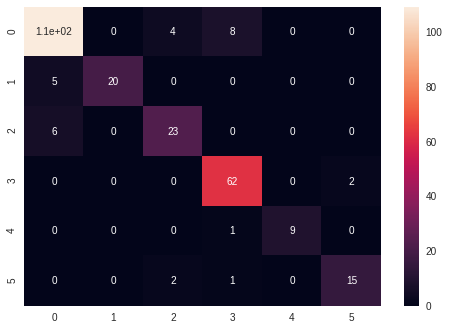

In [92]:
#plot of the confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True)
   

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       121
           1       1.00      0.80      0.89        25
           2       0.79      0.79      0.79        29
           3       0.86      0.97      0.91        64
           4       1.00      0.90      0.95        10
           5       0.88      0.83      0.86        18

    accuracy                           0.89       267
   macro avg       0.91      0.87      0.88       267
weighted avg       0.89      0.89      0.89       267

